# Exercice 1
**1)** Créer un son de fréquence 1000, Fréquence d'échnatillonage 44100 Hz et de durée 1 seconde. <Br>
**2)** chercher les notes musicales (Do, Ré, Mi, Fa Sol, La et Si) et jouer les pour une durée de 0.2 seconde chacune<Br>


Réponse au question 1 :

In [7]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
framerate = 44100
duree=0.2
t = np.linspace(0,5,framerate*5)
freq=1000
freq2=440
data = np.sin(2*np.pi*freq*t)
MaNote=data[0:round(framerate*duree)]
# Generate a player for mono sound
print ("longuer de la piste ", len(data))
Audio(MaNote,rate=framerate,autoplay=True)


longuer de la piste  220500


Réponse au question 2 :



In [29]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

framerate = 44100
duree = 0.5

t = np.linspace(0, duree, int(framerate*duree), endpoint=False)

frequences = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]

fade_len = int(0.05 * len(t))
fade = np.linspace(0, 1, fade_len)
envelope = np.ones_like(t)
envelope[:fade_len] = fade
envelope[-fade_len:] = fade[::-1]

notes = []
for f in frequences:
    notes.append(np.sin(2*np.pi*f*t) * envelope)

data = np.concatenate(notes)

# Convert to 16-bit PCM (required for wavfile.write)
data_int16 = np.int16(data / np.max(np.abs(data)) * 32767)

wavfile.write("testnote1.wav", framerate, data_int16)

Audio(data_int16, rate=framerate, autoplay=True)


# Exercice 2


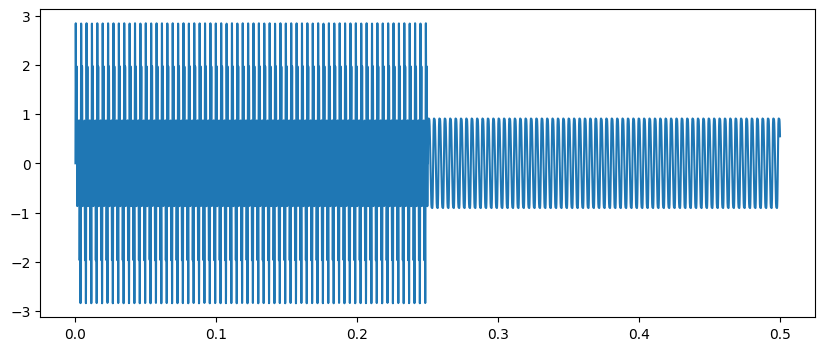

longuer de la piste  11025


In [9]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt
framerate = 44100
duree=0.25
freq=261.63
t = np.linspace(0,5,framerate*5)
AmplHarGui=[1,0.5,0,1,0.5]
AmplHarVio=[0.1,0.1,0.05,0,0]
def generate_sound(frequency, duration, sampling_rate,AmplHar):
  t = np.linspace(0,5,sampling_rate*5)
  Note=np.sin(2*np.pi*frequency*t)
  for i in range(len(AmplHar)):
      Note+=AmplHar[i]*np.sin(2*np.pi*(i+2)*frequency*t)
  MaNote= Note[0:round(sampling_rate*duration)]
  return MaNote

DoGuitar= generate_sound(freq, duree, framerate,AmplHarGui)
DoViolon= generate_sound(freq, duree, framerate,AmplHarVio)
data = np.concatenate((DoGuitar, DoViolon))
plt.figure(figsize=(10, 4))
plt.plot(t[0:len(data)], data)
plt.show()
# Generate a player for mono sound
print ("longuer de la piste ", len(DoGuitar))
Audio(data,rate=framerate,autoplay=True)
wavfile.write  ("testnote.wav", framerate,MaNote)

Réponse au question 1 :

In [30]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

framerate = 44100
duree = 0.25
freq = 261.63  # Do

AmplHarGui = [1, 0.5, 0, 1, 0.5]
AmplHarVio = [0.1, 0.1, 0.05, 0, 0]

def generate_sound(frequency, duration, sampling_rate, AmplHar):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    note = np.sin(2 * np.pi * frequency * t)
    for i in range(len(AmplHar)):
        note += AmplHar[i] * np.sin(2 * np.pi * (i + 2) * frequency * t)
    return note

# Générer Do guitare puis Do violon
do_guitar = generate_sound(freq, duree, framerate, AmplHarGui)
do_violin = generate_sound(freq, duree, framerate, AmplHarVio)

# Concaténer les deux sons
melodie = np.concatenate((do_guitar, do_violin))

# Jouer le son
Audio(melodie, rate=framerate)


Réponse au question 2:

AmplHarGui et AmplHarVio représentent les amplitudes des harmoniques du son pour simuler le timbre de différents instruments.


AmplHarGui = [1, 0.5, 0, 1, 0.5]
→ amplitudes des harmoniques 2, 3, 4, 5 et 6 d’une note de guitare

AmplHarVio = [0.1, 0.1, 0.05, 0, 0]
→ amplitudes des harmoniques 2, 3, 4, 5 et 6 d’une note de violon

Réponse au question 3 :

In [31]:
import numpy as np
from IPython.display import Audio

framerate = 44100
duree = 0.25
freq = 261.63  # Do

AmplHarGui = [1, 0.5, 0, 1, 0.5]
AmplHarVio = [0.1, 0.1, 0.05, 0, 0]

def generate_sound(frequency, duration, sampling_rate, AmplHar):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    note = np.sin(2 * np.pi * frequency * t)
    for i in range(len(AmplHar)):
        note += AmplHar[i] * np.sin(2 * np.pi * (i + 2) * frequency * t)
    return note

# Génération simultanée
do_guitar = generate_sound(freq, duree, framerate, AmplHarGui)
do_violin = generate_sound(freq, duree, framerate, AmplHarVio)

# Superposition (mélange)
accord = do_guitar + do_violin
accord = accord / np.max(np.abs(accord))  # normalisation

Audio(accord, rate=framerate)


Réponse au question 4 :

In [33]:
import numpy as np
from IPython.display import Audio

framerate = 44100

AmplHarGui = [1, 0.5, 0, 1, 0.5]
AmplHarVio = [0.1, 0.1, 0.05, 0, 0]

def generate_sound(frequency, duration, sampling_rate, AmplHar):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    note = np.sin(2 * np.pi * frequency * t)
    for i in range(len(AmplHar)):
        note += AmplHar[i] * np.sin(2 * np.pi * (i + 2) * frequency * t)
    return note

# Fréquences
Do = 261.63
Mi = 329.63

# Durées
duree_guitar = 0.5
duree_violin = 0.25

# Sons
do_guitar = generate_sound(Do, duree_guitar, framerate, AmplHarGui)
do_violin = generate_sound(Do, duree_violin, framerate, AmplHarVio)
mi_violin = generate_sound(Mi, duree_violin, framerate, AmplHarVio)

# Superposition Do_Guitar + Do_Violin (0.25 s)
mix1 = do_guitar[:len(do_violin)] + do_violin

# Reste de Do_Guitar seul (0.25 s)
reste_guitar = do_guitar[len(do_violin):]

# Puis Mi_Violin (0.25 s)
sequence = np.concatenate((mix1, reste_guitar, mi_violin))
sequence = sequence / np.max(np.abs(sequence))

Audio(sequence, rate=framerate)


# exercice 3
traitement audio


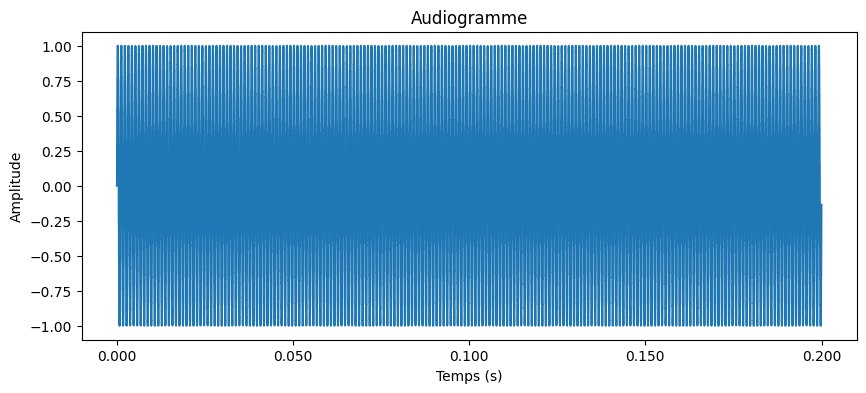

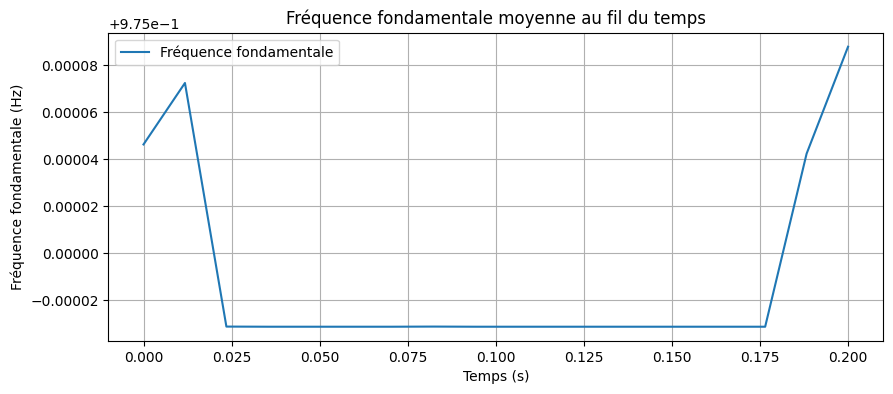

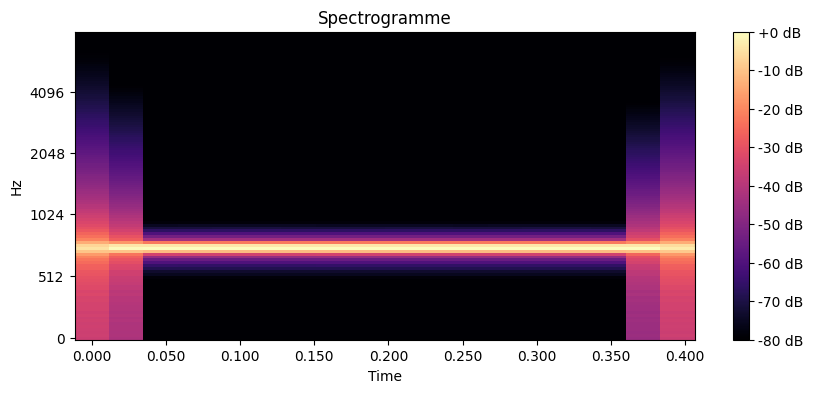

In [10]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Chemin vers le fichier audio et lecture
fichier_audio = "testnote.wav"


# Charger le fichier audio
signal_audio, frequence_echantillonnage = librosa.load(fichier_audio, sr=None)

# Afficher l'audiogramme
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal_audio, sr=frequence_echantillonnage)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Audiogramme')
plt.show()

# Afficher la fondamentale
frequence_fondamentale, _ = librosa.piptrack(y=signal_audio, sr=frequence_echantillonnage,fmin=50, fmax=2000)


# Calculer le temps pour l'axe x
temps = np.linspace(0, len(signal_audio) / frequence_echantillonnage, len(frequence_fondamentale[0]))
# Calculer la moyenne de la fréquence fondamentale sur toutes les pistes
frequence_fondamentale_moyenne = np.mean(frequence_fondamentale, axis=0)
# Afficher la courbe de la fréquence fondamentale moyenne au fil du temps
plt.figure(figsize=(10, 4))
plt.plot(temps, frequence_fondamentale_moyenne, label='Fréquence fondamentale')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence fondamentale (Hz)')
plt.title('Fréquence fondamentale moyenne au fil du temps')
plt.legend()
plt.grid(True)
plt.show()

# Afficher le spectrogramme
spectrogramme = librosa.feature.melspectrogram(y=signal_audio, sr=frequence_echantillonnage)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogramme, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme')
plt.show()

Audio(fichier_audio, autoplay=True)

# Exerice 4

longuer de la piste  220500


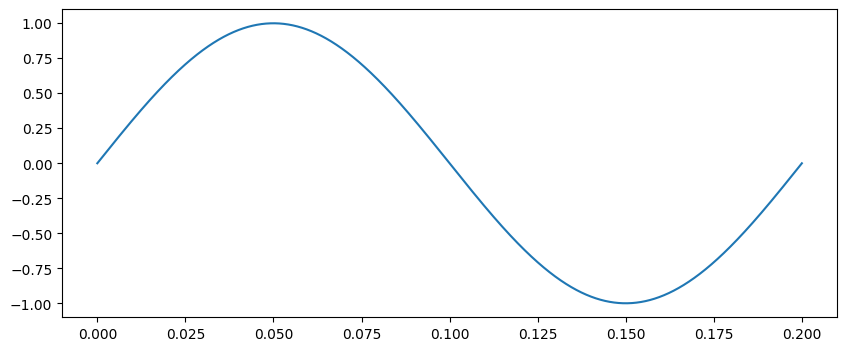

In [11]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt
framerate = 44100
duree=0.2
t = np.linspace(0,5,framerate*5)
t_env =  np.linspace(0,duree,round(framerate*duree))
enveloppe = np.sin(2*np.pi*t_env/duree)
freq=1000
freq2=440
data = np.sin(2*np.pi*freq*t)
MaNote=np.multiply(data[0:round(framerate*duree)],enveloppe)
# Generate a player for mono sound
print ("longuer de la piste ", len(data))
#Audio(MaNote,rate=framerate,autoplay=True)
plt.figure(figsize=(10, 4))
plt.plot(t[0:len(t_env)], enveloppe)
plt.show()